<a href="https://colab.research.google.com/github/kn9ck/MAT422/blob/master/HW1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 1.3
###1.3.1. QR decomposition
**QR Decomposition** is a method of decomposing a matrix **𝐴** into the product of two **𝑄** and **𝑅**, where **𝑄** is an orthogonal matrix, and **𝑅** is an upper triangular matrix.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1, 2],
              [2, 1]])

#QR decomposition
a1 = A[:, 0]  # first column of A
q1 = a1 / np.linalg.norm(a1)  # normalize a1

a2 = A[:, 1]  # second column of A
proj_q1_a2 = np.dot(q1, a2) * q1  # projection of a2 onto q1

u2 = a2 - proj_q1_a2  # subtract the projcetion to get orthogonal component
q2 = u2 / np.linalg.norm(u2)  # normalize to get q2

Q = np.column_stack((q1, q2))

# R = Q^T * A
R = np.dot(Q.T, A)

# verify QR = A
A_reconstructed = np.dot(Q, R)

print("A:\n", A)
print("\nQ: ", Q)
print("\nR: ", R)
print("\nQR:  ", A_reconstructed)

A:
 [[1 2]
 [2 1]]

Q:  [[ 0.4472136   0.89442719]
 [ 0.89442719 -0.4472136 ]]

R:  [[2.23606798e+00 1.78885438e+00]
 [3.33066907e-16 1.34164079e+00]]

QR:   [[1. 2.]
 [2. 1.]]


As we can see, QR is equal to the original matrix A.

---



### 1.3.2. Least-squares problems
Here we have an overdetermined system

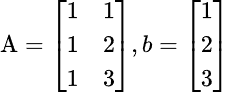

we find x such that Ax ≈ b

In [20]:

A = np.array([[1, 1],
              [1, 2],
              [1, 3]])
b = np.array([1, 2, 2])

#least-squares
x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

print("A: ", A)
print("b: ", b)
print("x: ", x)
print("Ax: ", np.dot(A,x))


A:  [[1 1]
 [1 2]
 [1 3]]
b:  [1 2 2]
x:  [0.66666667 0.5       ]
Ax:  [1.16666667 1.66666667 2.16666667]


Here we see Ax being computed, although it's not equal to b, it is indeed approximating it.

###1.3.3. Linear regression
Let's say we have data points for a simple linear regression problem. We want to fit a line  
 lagrida_latex_editor.png  to the data x = [0,1,2,3] y = [1,2,3,4]

In [21]:

x = np.linspace(0, 10, 50)
y = 1 + 2 * x + np.random.normal(0, 1, len(x))

A = np.vstack([np.ones(len(x)), x]).T

# solve least-squares problem to find the coefficients
beta, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
intercept, slope = beta
print("\nintercept:", intercept)
print("\nslope:", slope)
print("\nresiduals:", residuals)


intercept: 1.43750684783142

slope: 1.9025092920291748

residuals: [54.39918588]


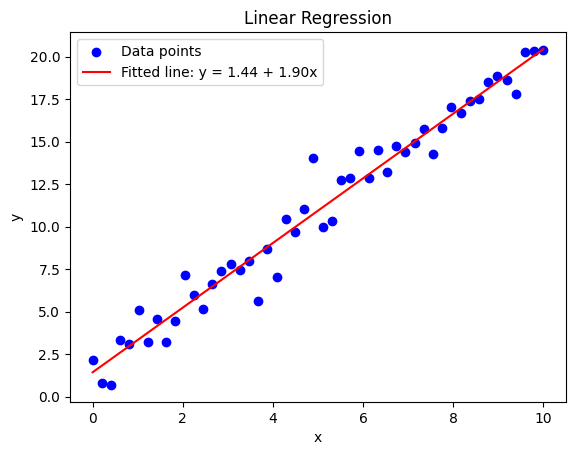

In [22]:

# Generate points for the fitted line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = intercept + slope * x_fit

# Plot the data points
plt.scatter(x, y, color='blue', label='Data points')

# plot fitted line
plt.plot(x_fit, y_fit, color='red', label=f'Fitted line: y = {intercept:.2f} + {slope:.2f}x')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()

# Show the plot
plt.show()

As we see in the plot, the line is fitted according to the data points.